In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

(150, 2)


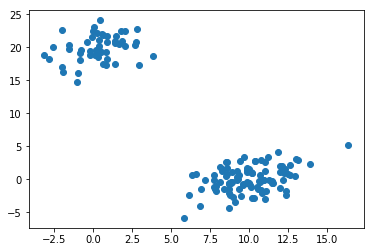

In [2]:
#You will now generate two clusters: (a), with 100 points, and (b), with 50.
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

#This creates 150 samples with 2 dimensions.
print( X.shape)
#Let’s quickly display it.
plt.scatter(X[:,0], X[:,1])
plt.show()

Cophenetic Correlation Coefficient: 0.9800148387574268


<Figure size 1800x720 with 0 Axes>

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0.5, 0, 'Sample Index')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [113.75, 113.75, 160.0, 160.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [185.0, 185.0, 203.75, 203.75],
  [136.875, 136.875, 194.375, 194.375],
  [39.375, 39.375, 165.625, 165.625],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [242.5, 242.5, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [300.0, 300.0,

AttributeError: module 'matplotlib.pyplot' has no attribute 'plt'

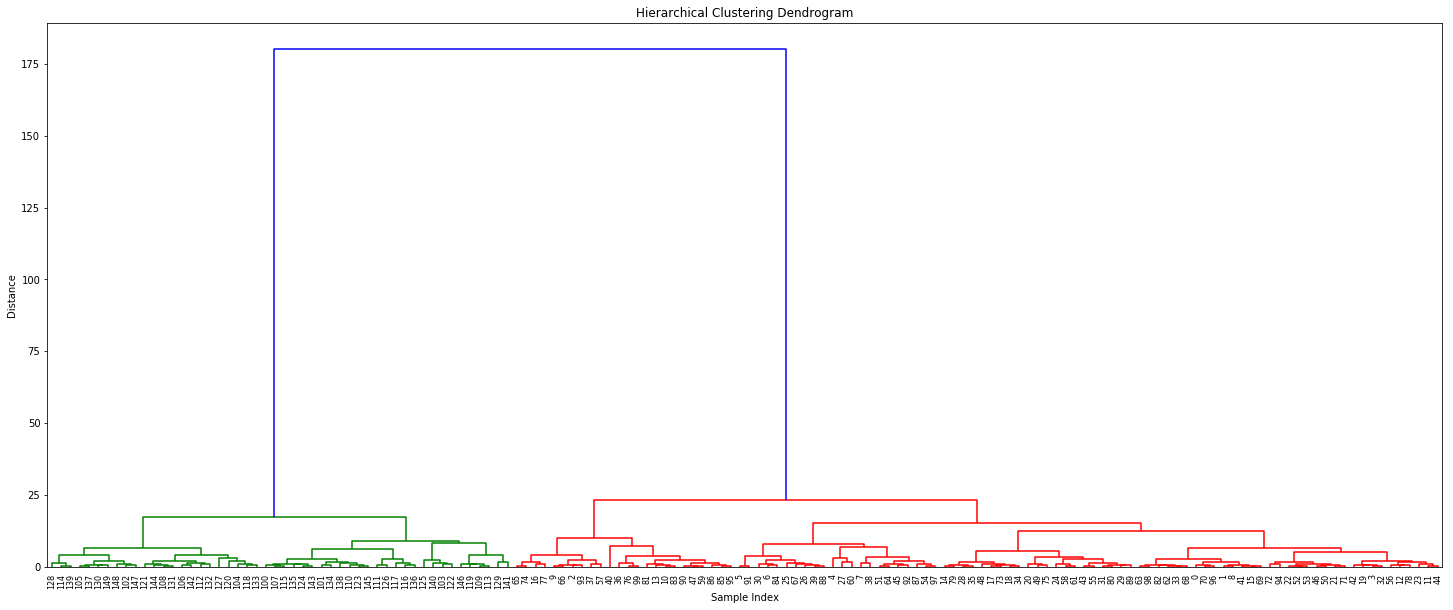

In [3]:
Z = linkage(X, 'ward')
#Enhance the ecosystem, by adding extra libraries.
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

#Trigger the cophenetic correlation coefficient. The cophenetic correlation coefficient
#is a measure of how faithfully a dendrogram preserves the pairwise distances between
#the original unmodeled data points. In simple terms, how accurate is the measure.

c, coph_dists = cophenet(Z, pdist(X))
print('Cophenetic Correlation Coefficient:',c)

#You will now calculate a full dendrogram.
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90,leaf_font_size=8,)
plt.plt.show()

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (truncated)')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'distance')

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
  [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103],
  [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588],
  [0.0, 7.11106083424195, 7.11106083424195, 0.0],
  [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
  [0.0, 6.65621608856717, 6.65621608856717, 0.0],
  [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717],
  [0.0, 12.42734657224792, 12.42734657224792, 0.0],
  [7.868785423127422,
   15.115331182663091,
   15.115331182663091,
   12.42734657224792],
  [9.844278294486319,
   23.121989355286757,
   23.121989355286757,
   15.115331182663091],
  [17.1152

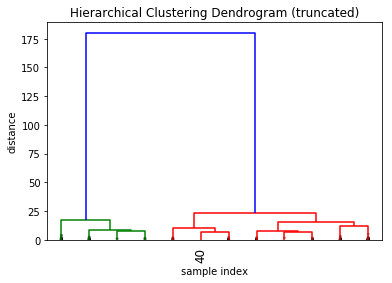

In [4]:
#Now, you can truncate the cluster (show only the last p merged clusters).
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
Z,
truncate_mode='lastp',
p=12,
show_leaf_counts=False,
leaf_rotation=90,
leaf_font_size=12,
show_contracted=True,
)
plt.show()

In [5]:
#You now must define a new function, to improve the diagram’s display.
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
        annotate_above = kwargs.pop('annotate_above', 0)
        ddata = dendrogram(*args, **kwargs)

        if not kwargs.get('no_plot', False):
            plt.title('Hierarchical Clustering Dendrogram (truncated)')
            plt.xlabel('sample index or (cluster size)')
            plt.ylabel('distance')

            for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
                x = 0.5 * sum(i[1:3])
                y = d[1]

                if y > annotate_above:
                    plt.plot(x, y, 'o', c=c)
                    plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                                 textcoords='offset points',
                                 va='top', ha='center')
            if max_d:
                plt.axhline(y=max_d, c='k')
                return ddata

In [6]:
#You can now use the new function against your clusters.
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10, # useful in small plots so annotations don't overlap
    )
plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
  [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103],
  [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588],
  [0.0, 7.11106083424195, 7.11106083424195, 0.0],
  [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
  [0.0, 6.65621608856717, 6.65621608856717, 0.0],
  [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717],
  [0.0, 12.42734657224792, 12.42734657224792, 0.0],
  [7.868785423127422,
   15.115331182663091,
   15.115331182663091,
   12.42734657224792],
  [9.844278294486319,
   23.121989355286757,
   23.121989355286757,
   15.115331182663091],
  [17.1152

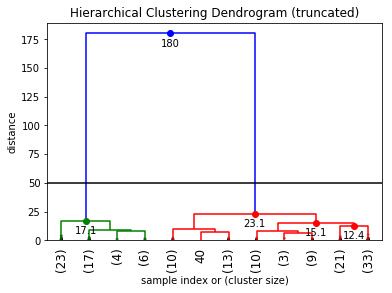

In [7]:
#Let’s set the cutoff to 50.
max_d = 50
#Now, you just replot the new data.
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,
    )
plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [82.5, 82.5, 110.0, 110.0],
  [52.5, 52.5, 96.25, 96.25],
  [13.75, 13.75, 74.375, 74.375]],
 'dcoord': [[0.0, 8.049352823485103, 8.049352823485103, 0.0],
  [0.0, 8.748222747739588, 8.748222747739588, 8.049352823485103],
  [0.0, 17.11527361712349, 17.11527361712349, 8.748222747739588],
  [0.0, 7.11106083424195, 7.11106083424195, 0.0],
  [0.0, 9.844278294486319, 9.844278294486319, 7.11106083424195],
  [0.0, 6.65621608856717, 6.65621608856717, 0.0],
  [0.0, 7.868785423127422, 7.868785423127422, 6.65621608856717],
  [0.0, 12.42734657224792, 12.42734657224792, 0.0],
  [7.868785423127422,
   15.115331182663091,
   15.115331182663091,
   12.42734657224792],
  [9.844278294486319,
   23.121989355286757,
   23.121989355286757,
   15.115331182663091],
  [17.1152

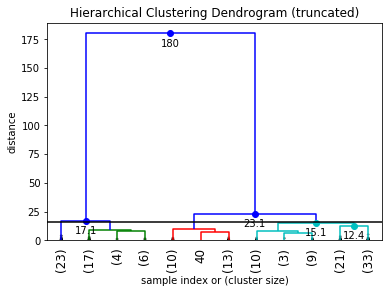

In [8]:
#Change the cut to 16.
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=16,
    )
plt.show()

[[ 1.80874989  2.17061644 10.          2.44276733]
 [ 2.31731998  2.19649179 16.          2.52742372]
 [ 2.24511599  2.44225327  9.          2.37659088]
 [ 2.30462321  2.44191287 21.          2.6387508 ]
 [ 2.20673283  2.68378067 17.          2.84581581]
 [ 1.95309037  2.58100378 29.          4.05821033]
 [ 3.46173275  3.53735716 28.          3.29443647]
 [ 3.15857131  3.54836284 28.          3.93327935]
 [ 4.90210137  5.10301603 28.          3.57041559]
 [12.12200256 32.15467931 30.          5.22936105]]
[[ 3.63777835  2.5556114   4.          1.35908084]
 [ 3.89767268  2.57216151  7.          1.54388156]
 [ 3.05885714  2.66707272  6.          1.87115096]
 [ 4.92746418  2.73259589  7.          1.39821573]
 [ 4.76943311  3.16276553  6.          1.60455941]
 [ 5.27287862  3.56604844  7.          2.00627335]
 [ 8.22057081  4.07583053  7.          1.69162096]
 [ 7.83287032  4.46681266  7.          2.07808207]
 [11.38091435  6.29430022  7.          1.86535033]
 [37.25844589 63.31539362  7. 

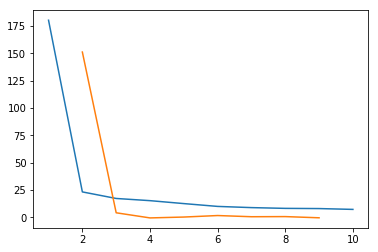

In [12]:
#Now, you add extra functions to investigate your transformation.
from scipy.cluster.hierarchy import inconsistent

#You can investigate at a depth of five?
depth = 5
incons = inconsistent(Z, depth)
print(incons[-10:])

#What are you seeing?
#Move to depth of three.
depth = 3
incons = inconsistent(Z, depth)
print(incons[-10:])

#What do you see? You will see it better with a graph.
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

#You should now look at the acceleration.
acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 # if idx 0 is the max of this we want 2


Clusters: 2


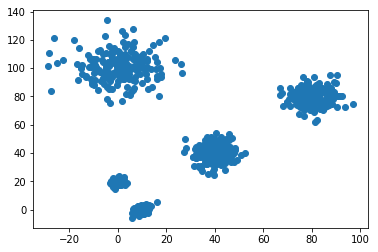

In [13]:
#clusters
print ("Clusters:", k)
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]],
size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])
X2 = np.concatenate((X, c, d, e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

<Figure size 720x720 with 0 Axes>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [25.0, 25.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [92.5, 92.5, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [213.75, 213.75, 267.5, 267.5],
  [176.25, 176.25, 240.625, 240.625],
  [111.25, 111.25, 208.4375, 208.4375],
  [47.5, 47.5, 159.84375, 159.84375]],
 'dcoord': [[0.0, 32.09277262053809, 32.09277262053809, 0.0],
  [0.0, 36.21

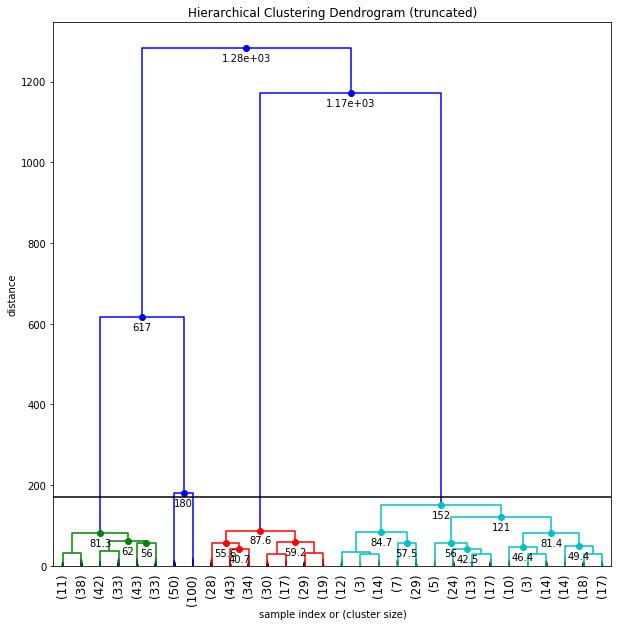

In [14]:
#Can you see the clusters? Here is a proper cluster diagram:
Z2 = linkage(X2, 'ward')
plt.figure(figsize=(10,10))
fancy_dendrogram(
Z2,
truncate_mode='lastp',
p=30,
leaf_rotation=90.,
leaf_font_size=12.,
show_contracted=True,
annotate_above=40,
max_d=170,
)
plt.show()

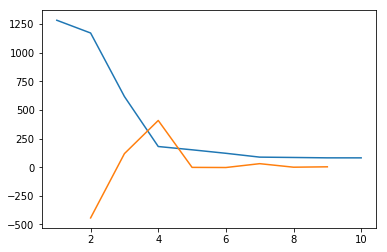

In [15]:
#Let’s look at the data in more detail.
last = Z2[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

#You can now perform more analysis.
acceleration = np.diff(last, 2) # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()

In [16]:
k = acceleration_rev.argmax() + 2 # if idx 0 is the max of this we want 2
#clusters
print ("Clusters:", k)
print (inconsistent(Z2, 5)[-10:])

#Let’s look at an F-cluster.
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
print(clusters)

Clusters: 4
[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

<Figure size 720x576 with 0 Axes>

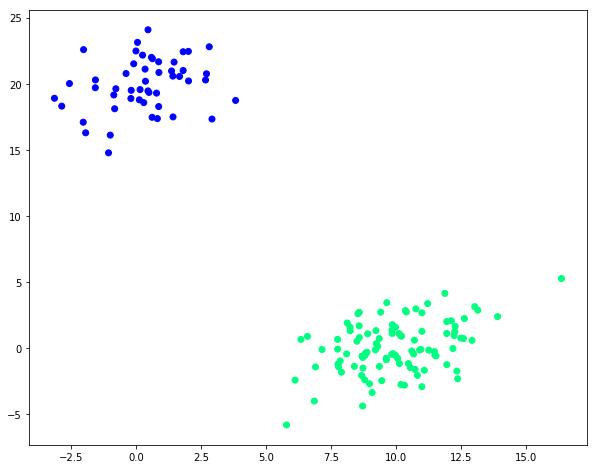

In [18]:
#Can you see the clusters?
k=2
fcluster(Z, k, criterion='maxclust')

#And now can you spot the clusters? It is not that easy to spot the clusters, is it? Let’s
#try a different angle.
from scipy.cluster.hierarchy import fcluster

fcluster(Z, 8, depth=10)
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='winter')
plt.show()